# About last lecture... 
(A very long time ago)

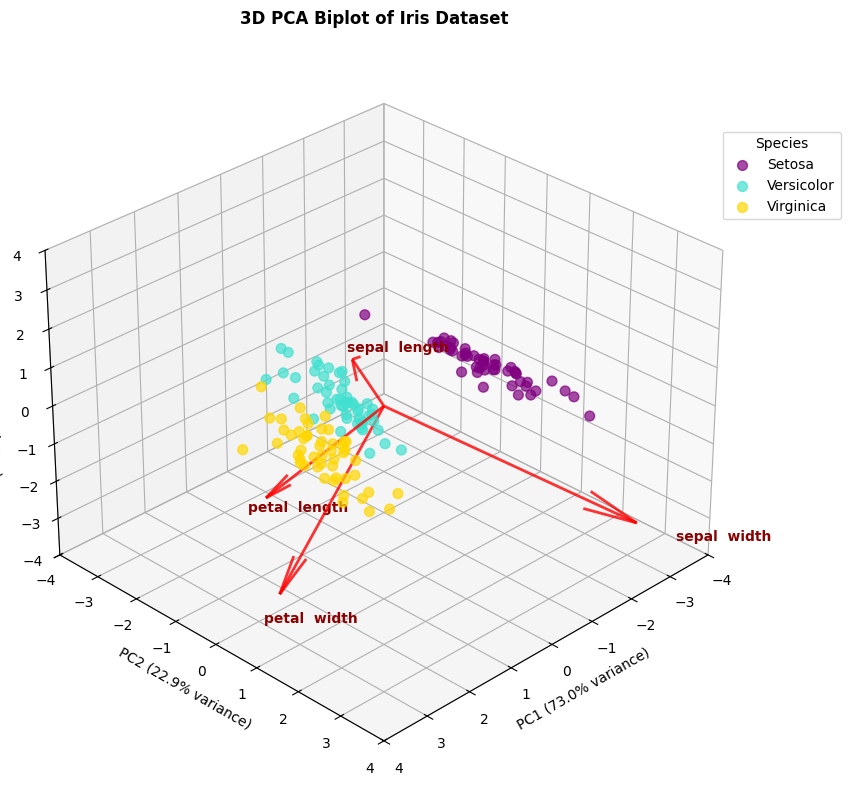

Explained Variance Ratios:
PC1: 72.962%
PC2: 22.851%
PC3: 3.669%

Normalized Feature Loadings (0-1 scale):
(Higher values = stronger influence)

sepal  length:
  PC1: 0.898 (+)
  PC2: 0.409 (+)
  PC3: 1.000 (+)

sepal  width:
  PC1: 0.464 (-)
  PC2: 1.000 (+)
  PC3: 0.340 (-)

petal  length:
  PC1: 1.000 (+)
  PC2: 0.027 (+)
  PC3: 0.198 (-)

petal  width:
  PC1: 0.973 (+)
  PC2: 0.073 (+)
  PC3: 0.881 (-)


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

# Load and prepare the data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = [name.replace(' (cm)', '').replace('length', ' length').replace('width', ' width') 
                for name in iris.feature_names]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Calculate loading vectors (scaled by their eigenvalues for visualization)
loading_scale = 5  # Scaling factor for visibility
loadings = pca.components_.T * loading_scale

# Create the 3D biplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points with better class labels
classes = ['Setosa', 'Versicolor', 'Virginica']
colors = ['purple', 'turquoise', 'gold']
for i, (label, color) in enumerate(zip(classes, colors)):
    mask = y == i
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], 
              c=color, label=label, alpha=0.7, s=50)

# Plot loading vectors with better visibility
for i, (name, loading) in enumerate(zip(feature_names, loadings)):
    # Draw the arrow
    ax.quiver(0, 0, 0,
              loading[0], loading[1], loading[2],
              color='red', alpha=0.8, arrow_length_ratio=0.2,
              linewidth=2)
    
    # Add labels with offset for better visibility
    ax.text(loading[0]*1.15, loading[1]*1.15, loading[2]*1.15, 
            name, color='darkred', fontsize=10, fontweight='bold')

# Set labels with variance explained
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')

# Set title
plt.title('3D PCA Biplot of Iris Dataset', pad=20, fontsize=12, fontweight='bold')

# Add legend with actual class names
ax.legend(title="Species", bbox_to_anchor=(1.15, 0.9))

# Set the viewing angle for better visualization
ax.view_init(elev=30, azim=45)

# Set axis limits for better proportion
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

# Add gridlines for better depth perception
ax.grid(True, alpha=0.3)

# Adjust layout to prevent cutting off
plt.tight_layout()

# Show the plot
plt.show()

# Get the raw loadings
loadings = pca.components_.T

# Function to normalize loadings to 0-1 scale
def normalize_loadings(loadings):
    # Take absolute values
    abs_loadings = np.abs(loadings)
    # Normalize by the maximum absolute value in each component
    normalized = abs_loadings / abs_loadings.max(axis=0)
    return normalized

# Get normalized loadings
normalized_loadings = normalize_loadings(loadings)

# Print results
print("Explained Variance Ratios:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3%}")

print("\nNormalized Feature Loadings (0-1 scale):")
print("(Higher values = stronger influence)")
for i, feature in enumerate(feature_names):
    print(f"\n{feature}:")
    for j in range(3):
        sign = '+' if loadings[i, j] > 0 else '-'
        print(f"  PC{j+1}: {normalized_loadings[i, j]:.3f} ({sign})")

# Recommender system

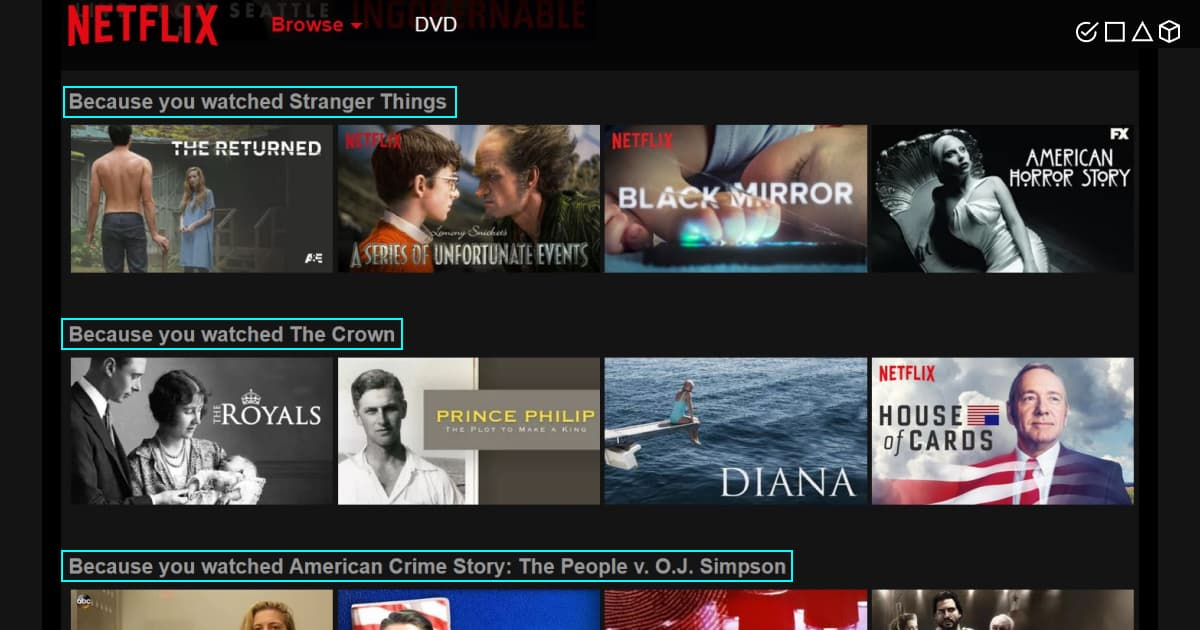

**What is a Recommender System?**  
A **recommender system** is an algorithmic framework designed to analyze user behavior, preferences, and historical data to predict future interests. It identifies the most relevant items from a large set of options and delivers personalized recommendations tailored to individual users.  

- **Core Function**: Predicts which items (e.g., products, videos, services) a user is most likely to prefer and ranks them to highlight top recommendations.  
- **Key Benefit**: Transforms overwhelming data into actionable, user-specific suggestions, enhancing decision-making efficiency and user satisfaction.  

---

**Why Are Recommender Systems Essential?**  

1. **Solving the Paradox of Choice**:  
   Modern consumers face endless options across digital platforms, leading to decision fatigue. Recommender systems cut through the noise by curating choices aligned with individual preferences.  

2. **Beyond Search Engines**:  
   While search engines address *information overload* by filtering results via keywords, they lack personalization. Recommender systems add a critical layer by leveraging user-specific data (e.g., past behavior, demographics, similar users' preferences) to deliver unique, adaptive suggestions.  

3. **Business and User Impact**:  
   - For **users**: Saves time, enhances discovery, and improves engagement.  
   - For **businesses**: Drives sales, increases retention, and builds long-term loyalty.  

---

**Real-World Applications**  
Recommender systems power some of the world’s most influential platforms:  
- **Netflix**: Recommends movies/shows based on viewing history.  
- **YouTube**: Suggests videos aligned with user interests.  
- **Amazon**: Personalizes product recommendations to boost purchases.  
- **Tinder**: Matches users using preference and interaction patterns.  

By balancing scalability with personalization, these systems have become indispensable in the digital economy.

**Designing a Recommender System: Key Approaches**  
Building an effective recommender system involves selecting the right methodology based on data availability, use case, and scalability. Below are two foundational techniques, illustrated with a **practical example** for clarity:  

###  **Content-Based Filtering**  
   - **What it does**: Recommends items *similar to those a user has liked before*, based on item attributes (e.g., genre, keywords, metadata).  
   - **How it works**:  
     - Analyzes user behavior (e.g., clicks, purchases, ratings) to create a **user profile**.  
     - Matches item features (e.g., movie genre, product category) to the user profile.  
   - **Example**:  
     *A streaming platform suggests horror movies to a user who frequently watches horror content, using metadata like genre, director, or keywords.*  

---

###  **Collaborative Filtering**  
   - **What it does**: Predicts user preferences by leveraging *patterns from similar users or items*, without requiring item metadata.  
   - **Two Primary Subtypes**:  

   **a. User-User Collaborative Filtering (Similar User-Based)**  
   - **Mechanism**: Identifies users with similar tastes and recommends items those users have liked.  
   - **Example**:  
     *If User A and User B both enjoy sci-fi movies and indie music, the system recommends User A a sci-fi film that User B recently watched.*  

   **b. Item-Item Collaborative Filtering (Rating-Based)**  
   - **Mechanism**: Focuses on similarities *between items* (e.g., books rated highly by the same users).  
   - **Example**:  
     *Users who rated "Harry Potter" highly also liked "The Hobbit." The system recommends "The Hobbit" to new readers of "Harry Potter."*  

---

**Practical Implementation Example**  
Imagine designing a **book recommendation system**:  
1. **Content-Based Approach**: Recommend books with similar themes/genres to the user’s reading history (e.g., fantasy novels for a Tolkien fan).  
2. **Collaborative Filtering**:  
   - **User-User**: Find readers with overlapping favorite books and suggest titles they’ve liked.  
   - **Item-Item**: Suggest "The Lord of the Rings" to users who read "Game of Thrones," based on rating patterns.  

---

**Key Considerations**  
- **Cold Start Problem**: Collaborative filtering struggles with new users/items (no prior data). Content-based methods mitigate this.  
- **Hybrid Systems**: Many modern systems (e.g., Netflix) combine both approaches for balanced accuracy and coverage.  



## Data $\rightarrow$ MovieLens 20M Dataset 

This dataset  describes 5-star rating  from [MovieLens](http://movielens.org), a movie recommendation service. It contains ratings across a big set of movies. These data were created by differents users between January 09, 1995 and November 21, 2019. 

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

**The primary goal of movie recommendation systems is to filter and predict only those movies that a corresponding user is most likely to want to watch**

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
# nltk.download(["punkt","stopwords","wordnet"])

In [3]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [4]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [5]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807



## **Content-Based Filtering with Cosine Similarity**  
**What is it?**  
A recommendation technique that leverages **item features** (e.g., genre, keywords, director) and a **single user’s historical preferences** to suggest items. Unlike collaborative methods, it ignores interactions from other users, focusing solely on aligning item attributes with the target user’s tastes.  

**How does it work?**  
1. **Feature Extraction**:  
   - Items (e.g., movies) are represented as **feature vectors** (e.g., `[genre=horror, director=Wes_Craven, keywords=“supernatural”]`).  
   - A **user profile** is built by aggregating features of items the user has liked/interacted with (e.g., averaging genre preferences).  

2. **Similarity Calculation**:  
   - **Cosine Similarity** measures the angle between the user’s preference vector and item feature vectors.  
   - Formula:  

     $$\text{Similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}$$
     
     where **A** = user profile, **B** = item features.  

3. **Recommendation**:  
   - Items with the highest similarity scores are prioritized.  

**Example**:  
If a user frequently watches *horror movies directed by Wes Craven*, the system:  
- Extracts features from their watch history (e.g., `genre=horror`, `director=Wes_Craven`).  
- Computes similarity scores for other movies (e.g., *"Scream"* has high similarity due to shared genre/director).  
- Recommends top matches, ignoring ratings or preferences of other users.  

**Advantages**:  
- Solves **cold-start problems** (works with no user interaction data beyond the target user).  
- Transparent recommendations (easy to explain why an item was suggested).  

**Limitations**:  
- Requires rich, structured item metadata.  
- May create a "filter bubble" (limited diversity in recommendations).  


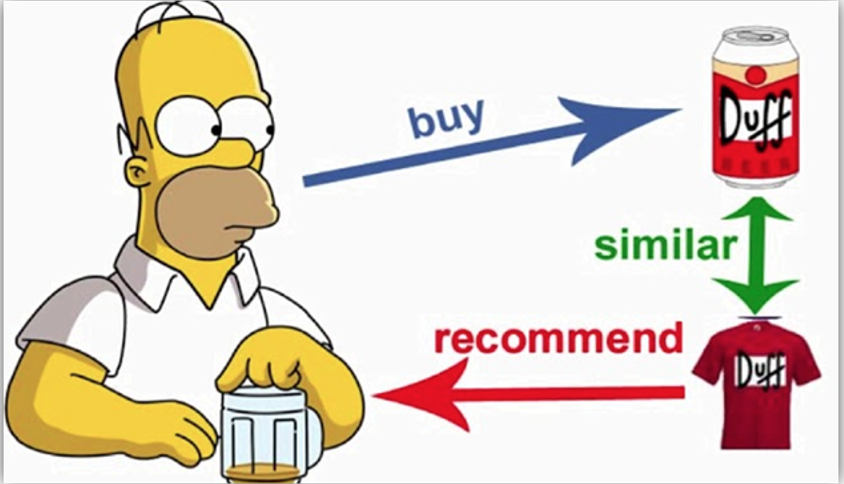

In [7]:
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm
tqdm.pandas()
lemmatizer = WordNetLemmatizer()
genres = movies["genres"].progress_apply(lambda x: x.lower().split('|')).apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x]))

  0%|          | 0/10329 [00:00<?, ?it/s]

### Question: Do you know what a lemmatizer does?






<details>
<summary>Click to [show/hide] content</summary>

In Lemmatization root word is called Lemma. A lemma is the canonical form, dictionary form, or citation form of a set of words. For example, runs, running, ran are all forms of the word run, therefore **run** is the lemma of all these words.
</details>

Take a look at the dataset

In [8]:
movies_dataset = pd.DataFrame(genres)
movies_dataset.index = movies['title']
movies_dataset

,genres
title,
Toy Story (1995),adventure animation child comedy fantasy
Jumanji (1995),adventure child fantasy
Grumpier Old Men (1995),comedy romance
Waiting to Exhale (1995),comedy drama romance
Father of the Bride Part II (1995),comedy
...,...
Cosmic Scrat-tastrophe (2015),animation child comedy
Le Grand Restaurant (1966),comedy
A Very Murray Christmas (2015),comedy


Convert a collection of text documents to a matrix of token counts

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
X = cv.fit_transform(movies_dataset["genres"]).toarray()

In [10]:
print("Count Vector : \n",X)
print("\nNote: First row of above count vector: ",X[0])
print("\nColumns Coresponding to above count vector are :\n",cv.get_feature_names_out())

Count Vector : 
 [[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Note: First row of above count vector:  [0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Columns Coresponding to above count vector are :
 ['action' 'adventure' 'animation' 'child' 'comedy' 'crime' 'documentary'
 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax' 'listed' 'musical'
 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war' 'western']


The dataset is composed of a movieId, a title and the one hot encoded genres 

In [11]:
output = movies.loc[:,['movieId','title']]
output = output.join(pd.DataFrame(X))
output

,movieId,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10325,146878,Le Grand Restaurant (1966),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10326,148238,A Very Murray Christmas (2015),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10327,148626,The Big Short (2015),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We can quickly check the similarity between the items

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(X) 
similarities

array([[1.        , 0.77459667, 0.31622777, ..., 0.4472136 , 0.        ,
        0.        ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.70710678, 0.        ,
        0.        ],
       ...,
       [0.4472136 , 0.        , 0.70710678, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Each row of matrix correspond to the similarity of a movie with all other movies (row len = 10329)

Let's take user 18 and a sample of an item they have seen

In [13]:
uid = 18
time = ratings.loc[ratings["userId"]==uid,["movieId","timestamp"]]
latest_movieId_watched_by_user = time.sort_values(by="timestamp",ascending=False)["movieId"].values[0]
movie_index = movies.loc[movies['movieId']==latest_movieId_watched_by_user,["title"]].index[0]
output.loc[output['movieId']==8798,:]

,movieId,title,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
5801,8798,Collateral (2004),1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


Let's now recommend movies based on his recent watched movie

In [14]:
similarity_values = pd.Series(similarities[movie_index])
similarity_values.sort_values(ascending=False)

2605     1.0
979      1.0
8297     1.0
309      1.0
6387     1.0
        ... 
4851     0.0
4842     0.0
4840     0.0
4836     0.0
10328    0.0
Length: 10329, dtype: float64

Check the first k=10 recommended item ids

In [15]:
similar_movie_indexes = list(similarity_values.sort_values(ascending=False).index)
similar_movie_indexes[:10]

[2605, 979, 8297, 309, 6387, 6378, 8061, 6864, 8317, 2303]

Remove the already watched movie to avoid recommended an already seen item to the user

In [16]:
similar_movie_indexes.remove(movie_index)

In [17]:
def get_movie_by_index(idx):
    return movies_dataset.index[idx]
def get_movie_by_id(mv_id):
    return movies.loc[movies['movieId']==mv_id,['title']].values[0][0]
get_movie_by_index(8899)

'Background to Danger (1943)'

In [18]:
print("Since u watched --->",get_movie_by_id(latest_movieId_watched_by_user),"We recommend you")
for i in range(15):
    print(get_movie_by_index(similar_movie_indexes[i]))

Since u watched ---> Collateral (2004) We recommend you
Hard-Boiled (Lat sau san taam) (1992)
Killer, The (Die xue shuang xiong) (1989)
Boondock Saints II: All Saints Day, The (2009)
Clear and Present Danger (1994)
Memory of a Killer, The (Zaak Alzheimer, De) (2003)
Infernal Affairs 2 (Mou gaan dou II) (2003)
Baader Meinhof Komplex, Der (2008)
Munich (2005)
Ninja Assassin (2009)
Double Jeopardy (1999)
Mesrine: Killer Instinct (L'instinct de mort) (2008)
Wild Card (2015)
Chained Heat (1983)
Face/Off (1997)
Lady Snowblood (Shurayukihime) (1973)


## Collaborative Filtering $\rightarrow$ Similar Users Based

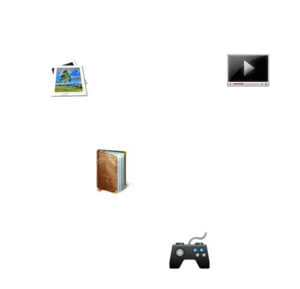

## **Collaborative Filtering: Predicting User Preferences**  
**What is it?**  
Collaborative filtering (CF) is a recommendation technique that predicts a user’s preferences by identifying patterns in the behaviors and ratings of **similar users or items**. Unlike content-based filtering, it requires no item metadata—only historical interaction data (e.g., ratings, clicks, purchases).  

**Key Idea**:  
- Users who share similar preferences in the past will likely agree on future choices.  
- Items preferred by overlapping user groups are likely to be similar.  

---

### **How Does Collaborative Filtering Work?**  
**Step 1: Build a User-Item Interaction Matrix**  
- Create a matrix where rows represent users, columns represent items, and cells contain ratings/interactions (e.g., 1–5 stars).  
- Example:  
  | User/Item | Movie A | Movie B | Movie C |  
  |-----------|---------|---------|---------|  
  | User 1    | 5       | 3       | ?       |  
  | User 2    | 4       | ?       | 2       |  
  | User 3    | ?       | 5       | 4       |  

**Step 2: Identify Similar Users or Items**  
- **User-User CF**: Find users with overlapping preferences (e.g., User 1 and User 3 both rate Movie B highly).  
- **Item-Item CF**: Find items rated similarly by the same users (e.g., users who like Movie A also like Movie B).  
- Similarity is calculated using metrics like **cosine similarity** or **Pearson correlation**.  

**Step 3: Generate Predictions**  
- Predict missing ratings (e.g., "User 1’s rating for Movie C") by averaging ratings from similar users/items.  
- Example:  
  *If Users 2 and 3 (similar to User 1) rated Movie C as 2 and 4, the system might predict User 1 would rate it 3.*  

**Step 4: Recommend Top Predictions**  
- Recommend items with the highest predicted ratings that the user hasn’t interacted with.  

---

### **Example Scenario**  
In the [referenced image](https://en.wikipedia.org/wiki/Collaborative_filtering), the system predicts that the **active user will dislike a video** because:  
- Users with similar tastes (e.g., User B and User C) also gave it low ratings.  
- The prediction is derived from aggregated patterns in the user-item matrix.  

---

### **Advantages**  
- **No Metadata Required**: Works with interaction data alone.  
- **Serendipity**: Can uncover unexpected recommendations (e.g., niche movies liked by similar users).  
- **Adaptive**: Improves as more user interactions are recorded.  

### **Limitations**  
- **Cold Start Problem**: Struggles with new users/items (no historical data).  
- **Sparsity**: Large matrices often have missing values, reducing accuracy.  
- **Scalability**: Computationally intensive for massive datasets.  

---

### **Real-World Applications**  
- **Netflix**: Recommends shows based on what similar users watch.  
- **Amazon**: Suggests products using item-item collaborative filtering (*"Customers who bought this also bought..."*).  
- **Spotify**: Creates personalized playlists by analyzing listening patterns of similar users.  

---

**Why It Matters**  
Collaborative filtering powers hyper-personalized experiences in modern platforms, bridging the gap between user preferences and vast item catalogs. Hybrid models (combining CF with content-based methods) are increasingly used to mitigate its limitations.  


Load the data

In [19]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [20]:
dataset = movies.merge(ratings, on='movieId')
dataset = dataset.loc[:,["userId","movieId","title","genres","rating"]]
df_ratings = dataset.loc[:,["title","rating"]].groupby("title").mean()
genres = dataset["genres"]

Create the genres' list from the pipe-separated string columns

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized = []
for i in range(len(genres)):
    temp = genres[i].split("|")
    for j in range(len(temp)):
        temp[j] = lemmatizer.lemmatize(temp[j])
    lemmatized.append(" ".join(temp))

Again, create the one hot encoded dataset

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(lemmatized).toarray()
genres = pd.DataFrame(X,columns=cv.get_feature_names_out())
dataset = dataset.iloc[:,:-2]
new_dataset = dataset.join(genres)
new_dataset.head()

,userId,movieId,title,action,adventure,animation,children,comedy,crime,documentary,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,2,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
users = new_dataset.drop(["movieId","title"],axis=1)
users_moviemat = users.groupby("userId").sum()
X = users_moviemat.iloc[:,:].values
users_moviemat.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
userId,,,,,,,,,,,,,,,,,,,,,
1,46,31,2,3,31,31,1,45,8,25,...,0,1,13,0,2,16,25,43,10,1
2,9,10,2,3,11,3,0,11,4,5,...,0,2,2,0,0,8,5,12,0,0
3,13,9,2,5,35,12,1,36,5,3,...,0,3,4,0,0,22,3,21,3,3
4,14,17,4,6,46,18,0,76,8,3,...,0,6,10,0,6,37,3,18,16,5
5,17,22,21,21,45,6,0,19,16,6,...,0,11,3,0,0,21,6,11,2,0


In the above matrix each row indicates user with id 1 watched 46 action movies, 31 adventure movies, 2 animation movies …

Now we need to find the similar user, who has similar tastes in terms of genres by the frequency of watched movies of that type.

Let’s train a classification model on this that uses techniques based on nearest data points to guess the class it belongs to. The data point that is closer to our observation is the predicted datapoint(Similar User).

**Obs**:
The principle behind *nearest neighbor* methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 
NearestNeighbors sklearn implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.

more about the choice https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms

In [24]:
from sklearn.neighbors import NearestNeighbors
classifier = NearestNeighbors(algorithm='auto')
classifier.fit(X)

NearestNeighbors()

In [25]:
uid = int(input("Enter User Id "))
neighbours = classifier.kneighbors([X[uid-1]],n_neighbors=5,return_distance=False)
neighbours

Enter User Id 18


array([[ 17, 472, 422,   0,  15]], dtype=int64)

Once we found the similar user, next step is to find movies which the similar user has seen and current user has not seen.

In [26]:
current_user = new_dataset.loc[new_dataset["userId"]==neighbours[0][0],:]["title"].values
similar_user = new_dataset.loc[new_dataset["userId"]==neighbours[0][1],:]["title"].values
movies_list = [movie for movie in similar_user if movie not in current_user]
for i in range(len(movies_list)):
    movies_list[i] = (movies_list[i], df_ratings['rating'][df_ratings.index == movies_list[i]].values[0])
print("Recommended Movies are for user",uid,':')
movies_list

Recommended Movies are for user 18 :


[('City of Lost Children, The (Cité des enfants perdus, La) (1995)',
  4.233333333333333),
 ('Adventures of Priscilla, Queen of the Desert, The (1994)',
  3.4791666666666665),
 ('Underground (1995)', 4.166666666666667),
 ("It's a Wonderful Life (1946)", 3.9649122807017543),
 ('Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 4.45945945945946),
 ('Delicatessen (1991)', 4.0227272727272725),
 ('Brazil (1985)', 4.0479452054794525),
 ('Lawrence of Arabia (1962)', 4.166666666666667),
 ('Truman Show, The (1998)', 3.8401639344262297),
 ('Wag the Dog (1997)', 3.4444444444444446),
 ('Roger & Me (1989)', 3.914285714285714),
 ('Indiana Jones and the Temple of Doom (1984)', 3.743119266055046),
 ('Beetlejuice (1988)', 3.5981308411214954),
 ('Edward Scissorhands (1990)', 3.6153846153846154),
 ('Who Framed Roger Rabbit? (1988)', 3.5695652173913044),
 ('Spaceballs (1987)', 3.509433962264151),
 ('Dogma (1999)', 3.5955882352941178),
 ('Fatal Attraction (1987)', 3.35),
 ('Unbreakable (2000)', 3.5942028985

## **Collaborative Filtering → Correlation (Rating-Based)**  
**What is it?**  
A recommendation technique that predicts a user’s preferences by analyzing **patterns in user-item ratings**, without relying on item content or metadata. It identifies similarities between users or items based on their historical interactions (e.g., ratings, likes) and uses these patterns to generate personalized recommendations.  

**Key Idea**:  
- Users who have rated items similarly in the past are likely to agree on future ratings.  
- Items frequently rated highly by the same users are likely to be similar.  

---

### **How Does It Work?**  
**Step 1: Build a User-Item Rating Matrix**  
- Construct a matrix where:  
  - **Rows** represent users.  
  - **Columns** represent items (e.g., movies).  
  - **Cells** contain ratings (e.g., 1–5 stars).  
  - Missing values (e.g., `?`) indicate unrated items.  

  | User/Item | Movie A | Movie B | Movie C |  
  |-----------|---------|---------|---------|  
  | User 1    | 5       | 3       | ?       |  
  | User 2    | 4       | ?       | 2       |  
  | User 3    | ?       | 5       | 4       |  

**Step 2: Calculate Similarity Using Correlation**  
- **Pearson Correlation** measures how closely two users’ rating patterns align.  
  \[
  \text{Correlation}(U_i, U_j) = \frac{\sum (r_{i,k} - \bar{r_i})(r_{j,k} - \bar{r_j})}{\sqrt{\sum (r_{i,k} - \bar{r_i})^2} \sqrt{\sum (r_{j,k} - \bar{r_j})^2}}
  \]  
  - \(r_{i,k}\): Rating of user \(i\) for item \(k\).  
  - \(\bar{r_i}\): Average rating of user \(i\).  

**Step 3: Predict Missing Ratings**  
- For a target user and unrated item, aggregate ratings from **similar users** (weighted by correlation strength).  
  \[
  \text{Predicted Rating}(U_i, I_j) = \bar{r_i} + \frac{\sum_{k=1}^n \text{Correlation}(U_i, U_k) \cdot (r_{k,j} - \bar{r_k})}{\sum_{k=1}^n |\text{Correlation}(U_i, U_k)|}
  \]  

**Step 4: Recommend Top Predicted Items**  
- Recommend items with the highest predicted ratings that the user hasn’t interacted with.  

---

### **Example**  
In the [referenced Wikipedia image](https://en.wikipedia.org/wiki/Collaborative_filtering):  
- **Active User**: Has rated several movies but not "Video X."  
- **Similar Users**: Users B and C, who share high correlation with the active user, rated "Video X" poorly.  
- **Prediction**: The system infers the active user will dislike "Video X" based on low ratings from similar users.  

---

### **Advantages**  
- **No Item Metadata Needed**: Relies solely on user ratings.  
- **Serendipity**: Discovers unexpected items liked by similar users (e.g., niche films).  
- **Adaptive**: Improves as more users rate items.  

### **Limitations**  
- **Cold Start Problem**: Fails for new users/items with no rating history.  
- **Data Sparsity**: Accuracy drops if the user-item matrix is sparse (many missing ratings).  
- **Scalability**: Computationally intensive for large datasets.  

---

### **Real-World Application**  
- **MovieLens/Netflix**: Predicts movie ratings using user-user correlation.  
- **Amazon**: Uses item-item correlation for *"Customers who bought this also bought..."* recommendations.  

---

**Why It Matters**  
Rating-based collaborative filtering is foundational for personalized recommendations, enabling platforms to turn sparse user interactions into actionable insights. Hybrid models (e.g., combining it with content-based filtering) are often used to mitigate its weaknesses.  


In [27]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
dataset = ratings.merge(movies, on='movieId')
df = dataset.groupby("title")['rating'].mean()
df1 = dataset.groupby("title")['rating'].count()
dataset_based_on_ratings = pd.DataFrame({"rating":df,"number of ratings":df1})
dataset_based_on_ratings

,rating,number of ratings
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
...,...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000,1
xXx (2002),2.958333,24
xXx: State of the Union (2005),2.071429,7


The values of the matrix represent the rating for each movie by each user.

In [28]:
df = dataset.loc[:,["userId","rating","title"]]
users_movie_matrix = pd.pivot_table(df,columns='title',index='userId',values='rating') 
users_movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [29]:
movie_watched = users_movie_matrix["Jurassic Park (1993)"]
y = users_movie_matrix["Silence of the Lambs, The (1991)"]

In [30]:
correlations = []
for col in range(len(users_movie_matrix.columns)):
    correlations.append(movie_watched.corr(users_movie_matrix.iloc[:,col]))
correlations = pd.Series(correlations)

In [31]:
df = pd.DataFrame({"title": users_movie_matrix.columns,"Correlation": correlations,
                   "number of ratings" : dataset_based_on_ratings["number of ratings"].values})
df

,title,Correlation,number of ratings
0,'71 (2014),NaN,1
1,'Hellboy': The Seeds of Creation (2004),NaN,1
2,'Round Midnight (1986),NaN,1
3,'Til There Was You (1997),1.000000,3
4,"'burbs, The (1989)",0.635632,20
...,...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),NaN,1
10319,xXx (2002),0.371814,24
10320,xXx: State of the Union (2005),0.760886,7
10321,¡Three Amigos! (1986),0.637737,40


Sort the dataset with respect to the correlation column and remove the rows with *NaN* values. The dataset looks like:

In [32]:
df.dropna(inplace=True)
df.sort_values(by=["Correlation"],ascending=False)

,title,Correlation,number of ratings
1682,"Castle, The (1997)",1.0,7
4123,Hero at Large (1980),1.0,2
8487,Speechless (1994),1.0,6
8483,"Specials, The (2000)",1.0,2
8420,Sonatine (Sonachine) (1993),1.0,5
...,...,...,...
5044,Killshot (2008),-1.0,2
3665,Gloria (1999),-1.0,3
3647,"Girlfriend Experience, The (2009)",-1.0,2
5074,King of the Hill (1993),-1.0,2


Let's check for an arbitrary movie

In [33]:
movie_watched = users_movie_matrix[input("Enter a Movie Name SVP ").strip()]
print("loading.....")
correlations = []
for col in range(len(users_movie_matrix.columns)):
    correlations.append(movie_watched.corr(users_movie_matrix.iloc[:,col]))
correlations = pd.Series(correlations)
df = pd.DataFrame({"title": users_movie_matrix.columns,"Correlation": correlations,
                   "number of ratings" : dataset_based_on_ratings["number of ratings"].values})
df[df["number of ratings"] >= 50].sort_values(by=["Correlation","number of ratings"],ascending=False).iloc[1:6,:]

Enter a Movie Name SVP Speechless (1994) 	
loading.....


,title,Correlation,number of ratings
1370,Braveheart (1995),1.0,248
304,Aladdin (1992),1.0,191
3182,"Fifth Element, The (1997)",1.0,140
2706,Dragonheart (1996),1.0,70
1912,"Client, The (1994)",1.0,65


# Now it's your turn : [challenge](https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data?datasetId=1636&sortBy=voteCount&language=Python) on [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize)
